# PREPARACIÓN DE DATOS PARA PANEL DE DATOS CLIMÁTICOS

### Autor: Javier Cebrián Casado

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import datetime
from scipy import stats
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore

## DESCRIPCIÓN

El presente código transforma los datos y precalcula las tablas que sirven de ingesta al panel de datos climáticos elaborado con los datos obtenidos por la estación meteorológica de Valdepeñas de la Sierra (Guadalajara)

Los datos se sirven en el formato csv generado por la estación y se adaptan para calcular las estadísticas y tendencias.

Se generan como salida uns archivo xlsx con las estadisticas relativas a cada instrumento en pestañas diferentes y el csv con la serie temporal de cada instrumento por columnas.

### 1. Parámetros

In [4]:
# root_path = 'C:/Users/jc_ce/Desktop/01Proyectos/Meteoclimatic/Datos'
root_path = 'C:\\Users\\jc_ce\\Desktop\\01Proyectos\\Meteoclimatic\\Datos'

name = 'ESCLM1900000019184A'
out_name = 'ESCLM1900000019184A.csv'
out_stats_name = 'ESCLM1900000019184A_stats.xlsx'
out_pred_name = 'ESCLM1900000019184A_pred.xlsx'
out_compare_name = 'ESCLM1900000019184A_compare.xlsx'
out_predict_name = 'ESCLM1900000019184A_predict.xlsx'

file_names = [
    'ESCLM1900000019184A_201401a201412.csv', 
    'ESCLM1900000019184A_201501a201512.csv', 
    'ESCLM1900000019184A_201601a201612.csv', 
    'ESCLM1900000019184A_201701a201712.csv', 
    'ESCLM1900000019184A_201801a201812.csv', 
    'ESCLM1900000019184A_201901a201912.csv', 
    'ESCLM1900000019184A_202001a202012.csv', 
    'ESCLM1900000019184A_202101a202112.csv', 
    'ESCLM1900000019184A_202201a202207.csv',
    'ESCLM1900000019184A_202208a202208.csv',
    'ESCLM1900000019184A_202209a202209.csv',
    'ESCLM1900000019184A_202210a202211.csv',
    'ESCLM1900000019184A_202211a202212.csv',
    'ESCLM1900000019184A_202212a202212.csv',
    'ESCLM1900000019184A_202212a202301.csv',
    'ESCLM1900000019184A_202301a202302.csv',
    'ESCLM1900000019184A_202302a202302.csv',
    'ESCLM1900000019184A_202303a202303.csv',
    'ESCLM1900000019184A_202304a202304.csv',
    'ESCLM1900000019184A_202305a202305.csv',
    'ESCLM1900000019184A_202306a202306.csv',
    'ESCLM1900000019184A_202307a202307.csv',
    'ESCLM1900000019184A_202308a202308.csv',
    'ESCLM1900000019184A_202309a202309.csv',
    'ESCLM1900000019184A_202310a202310.csv',
    'ESCLM1900000019184A_202311a202312.csv',
    'ESCLM1900000019184A_202401a202401.csv',
    'ESCLM1900000019184A_202402a202402.csv',
    'ESCLM1900000019184A_202403a202403.csv',
    'ESCLM1900000019184A_202404a202404.csv',
    'ESCLM1900000019184A_202405a202405.csv',
    'ESCLM1900000019184A_202406a202406.csv'
]

# Datos para el cálculo de regresión lineal
out_trend_name = 'ESCLM1900000019184A_trend.csv'
out_res_name = 'ESCLM1900000019184A_res.csv'

format_date = '%Y%m%d'
floor = datetime.datetime.strptime('20150831',format_date) 
upper = datetime.datetime.strptime('20231231',format_date) 

# Datos para la predicción
floor_train_predict = datetime.datetime.strptime('20160101',format_date) 
# Año mínimo para las comparaciones
floor_year_compare = 2015
# Variables en las que se crea la tabla de comparaciones
compare_variables = ['T. Max.', 'T. Min.', 'H. Max.', 'H. Min.', 'P. Max.', 'P. Min.', 'Vel.', 'Precipitación']

### 2 Lectura de archivos
#### 2.1 Generación del dataframe

In [5]:
file_paths = [os.path.join(root_path, file_i) for file_i in file_names]

df_list = []
for file_i in file_paths:
    df_aux = pd.read_csv(file_i, delimiter='\t', header = 2)
    df_list.append(df_aux)

df_out = pd.concat(df_list, axis=0)

new_index = df_out['date']
format_date = '%Y%m%d'
new_index = [datetime.datetime.strptime(str(indice_i),format_date) for indice_i in new_index]
df_out.index = new_index
df_out.columns = ['date', 'T. Max.', 'T. Min.', 'H. Max.', 'H. Min.', 'P. Max.', 'P. Min.', 'Vel.', 'Precipitación']

### Calcula Amplitud
df_out['T. Amp.'] = abs(df_out['T. Max.'] - df_out['T. Min.'])
df_out['P. Amp.'] = abs(df_out['P. Max.'] - df_out['P. Min.'])
df_out['H. Amp.'] = abs(df_out['H. Max.'] - df_out['H. Min.'])

### Calcula Temeperatura media Td1 (Tmax -Tmin)/2 diaria Es la mejor aproximación dado que no tenemos resolución horaria
df_out['T. med1.'] = abs(df_out['T. Max.'] + df_out['T. Min.']) / 2
df_out['P. med1.'] = abs(df_out['P. Max.'] + df_out['P. Min.']) / 2
df_out['H. med1.'] = abs(df_out['H. Max.'] + df_out['H. Min.']) / 2

df_out.drop_duplicates(keep='first', inplace=True)

### Días flatantes
missing_dates = pd.date_range(start = df_out['T. med1.'].index[0], end = df_out['T. med1.'].index[-1] ).difference(df_out['T. med1.'].index)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jc_ce\\Desktop\\01Proyectos\\Meteoclimatic\\Datos/ESCLM1900000019184A_201401a201412.csv'

#### 2.2 Outlier manuales

In [7]:
format_date = '%Y%m%d'
df_out.loc[df_out.index == datetime.datetime.strptime('20180517',format_date),'P. Min.'] = np.nan
df_out.loc[df_out.index == datetime.datetime.strptime('20180517',format_date),'P. med1.'] = np.nan


# Drop cases with  Tmin = Tmax
if (df_out.loc[df_out['T. Max.'] == df_out['T. Min.'],:].index).shape[0] > 0:
    df_out = df_out.drop([df_out.loc[df_out['T. Max.'] == df_out['T. Min.'],:].index[0]])
# df_out.loc[df_out['T. Max.'] == df_out['T. Min.'], ['T. Max.', 'T. Min.', 'H. Max.', 'H. Min.', 'P. Max.', 'P. Min.', 'Vel.', 'Precipitación', 'T. Amp.', 'P. Amp.', 'H. Amp.', 'T. med1.']] = df_out.loc[df_out['T. Max.'] == df_out['T. Min.'], ['T. Max.', 'T. Min.', 'H. Max.', 'H. Min.', 'P. Max.', 'P. Min.', 'Vel.', 'Precipitación', 'T. Amp.', 'P. Amp.', 'H. Amp.', 'T. med1.']].ffill(value=np.nan)

#### 2.3 Explore

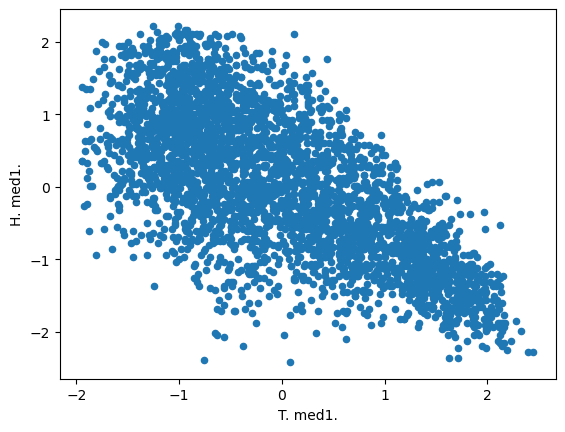

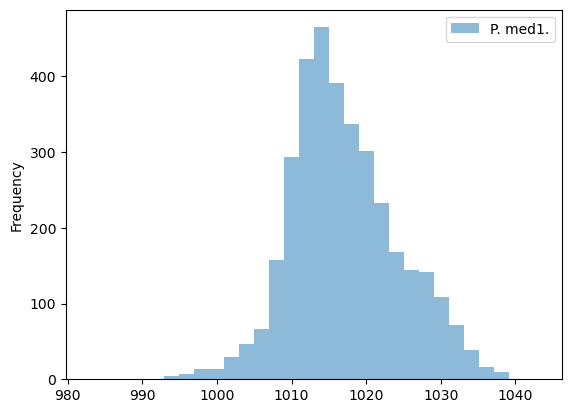

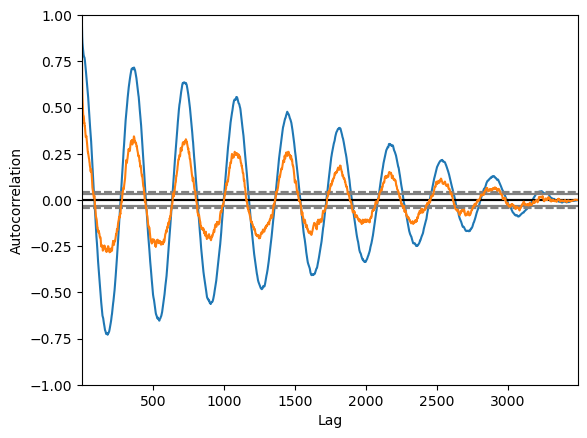

In [8]:
df_out[['T. med1.','P. med1.']].corr(method='pearson')
df_out[['T. med1.','P. med1.']].corr(method='pearson')
df_out[['T. med1.','H. med1.']].corr(method='pearson')
df_out[['T. med1.','H. med1.']].corr(method='pearson')

# df_out[['Vel.','T. med1.']].plot.scatter(x='Vel.',y='T. med1.')
# df_out[['T. med1.','P. med1.']].plot.scatter(x='T. med1.',y='P. med1.')
# df_out[['T. med1.','H. med1.']].plot.scatter(x='T. med1.',y='H. med1.')

df_out_z = df_out.copy()
df_out_z = df_out_z.dropna(axis=0)
df_out_z = df_out_z.apply(zscore)

# df_out_z[['T. med1.','P. med1.']].plot.scatter(x='T. med1.',y='P. med1.')
df_out_z[['T. med1.','H. med1.']].plot.scatter(x='T. med1.',y='H. med1.')
# df_out_z[['Precipitación','H. med1.']].plot.scatter(x='Precipitación',y='H. med1.')

# df_out_z[['Vel.','P. med1.']].plot.scatter(x='Vel.',y='P. med1.')

# df_out[['T. med1.']].plot.hist(bins=30, alpha=0.5)
# df_out[['H. med1.']].plot.hist(bins=30, alpha=0.5)
df_out[['P. med1.']].plot.hist(bins=30, alpha=0.5)
# df_out[['P. Max.']].plot.hist(bins=30, alpha=0.5)
plt.show()


x = pd.plotting.autocorrelation_plot(df_out['T. med1.']) 
x_2 = pd.plotting.autocorrelation_plot(df_out['H. med1.']) 
x.plot()
x_2.plot()
plt.show()




#### 2.4 Guardar dataframe

In [9]:
df_out.to_csv(out_name, sep=';')

### 3 Generación de excel de estadísticas
#### 3.1 Calcula medias por mes (las medias por mes para cada año y el conjunto)
En el caso de precipitación se calcula el acumulado por mes y se añade la columna de la suma anual

In [11]:
iter_cols = ['T. Max.', 'T. Min.', 'H. Max.', 'H. Min.', 'P. Max.', 'P. Min.', 'Vel.', 'Precipitación', 'T. med1.']

years_list = df_out.index.year.unique().to_list()
month_dict = {
    'Ene' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'May' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Sep' : 9,
    'Oct' : 10,
    'Nov' : 11,
    'Dic' : 12
}

index_list = years_list.copy()
index_list.append('Interanual')
col_list = list(month_dict.keys())

writer = pd.ExcelWriter(out_stats_name, engine='xlsxwriter')

for col_i in iter_cols:
    df_aux = pd.DataFrame(columns= col_list, index=index_list)
    for month_i in col_list:
        for year_i in years_list:
            if not col_i == 'Precipitación':
                df_aux.loc[year_i, month_i] = round(df_out.loc[(df_out.index.year == year_i) & (df_out.index.month == month_dict[month_i]), col_i].mean(), 1)
            else:
                if not len(df_out.loc[(df_out.index.year == year_i) & (df_out.index.month == month_dict[month_i]), col_i]) == 0:
                        df_aux.loc[year_i, month_i] = round(df_out.loc[(df_out.index.year == year_i) & (df_out.index.month == month_dict[month_i]), col_i].sum(), 1)
        df_aux.loc['Interanual', month_i] = round(df_aux.loc[years_list ,month_i].mean(), 1)
    if col_i == 'Precipitación':
        for year_i in years_list:
            df_aux.loc[year_i, 'Anual'] = round(df_aux.loc[year_i].sum(), 1)
            
    df_aux.index.name=''
    df_aux.to_excel(writer, sheet_name=col_i + ' mes')

#### 3.2 Tablas de Records Absolutos

In [12]:
# TEMPERATURAS

df_stats_temp = pd.DataFrame({'Estadísticas': ['Media td1 Mínima Abs. (Histórico)', 'Media td1 Max. Abs. (Histórico)',
                                               'Mínima Abs. (Histórico)', 'Mínima Max. Abs. (Histórico)', 
                                               'Máxima Abs. (Histórico)', 'Máxima Min. Abs. (Histórico)', 
                                               'Min. amplitud Abs. (Histórico)', 'Max. amplitud Abs. (Histórico)'],
                              'Fecha': [0,0,0,0,0,0,0,0],
                              'Temperatura [ºC]': [0,0,0,0,0,0,0,0]})

df_stats_temp = df_stats_temp.set_index('Estadísticas')
df_stats_temp.loc['Media td1 Mínima Abs. (Histórico)','Temperatura [ºC]'] = df_out['T. med1.'].min()
df_stats_temp.loc['Media td1 Mínima Abs. (Histórico)','Fecha'] = df_out['T. med1.'].idxmin()
df_stats_temp.loc['Media td1 Max. Abs. (Histórico)','Temperatura [ºC]'] = df_out['T. med1.'].max()
df_stats_temp.loc['Media td1 Max. Abs. (Histórico)','Fecha'] = df_out['T. med1.'].idxmax()
df_stats_temp.loc['Mínima Abs. (Histórico)','Temperatura [ºC]'] = df_out['T. Min.'].min()
df_stats_temp.loc['Mínima Abs. (Histórico)','Fecha'] = df_out['T. Min.'].idxmin()
df_stats_temp.loc['Mínima Max. Abs. (Histórico)','Temperatura [ºC]'] = df_out['T. Min.'].max()
df_stats_temp.loc['Mínima Max. Abs. (Histórico)','Fecha'] = df_out['T. Min.'].idxmax()
df_stats_temp.loc['Máxima Abs. (Histórico)','Temperatura [ºC]'] = df_out['T. Max.'].max()
df_stats_temp.loc['Máxima Abs. (Histórico)','Fecha'] = df_out['T. Max.'].idxmax()
df_stats_temp.loc['Máxima Min. Abs. (Histórico)','Temperatura [ºC]'] = df_out['T. Max.'].min()
df_stats_temp.loc['Máxima Min. Abs. (Histórico)','Fecha'] = df_out['T. Max.'].idxmin()
df_stats_temp.loc['Min. amplitud Abs. (Histórico)','Temperatura [ºC]'] = df_out['T. Amp.'].min()
df_stats_temp.loc['Min. amplitud Abs. (Histórico)','Fecha'] = df_out['T. Amp.'].idxmin()
df_stats_temp.loc['Max. amplitud Abs. (Histórico)','Temperatura [ºC]'] = df_out['T. Amp.'].max()
df_stats_temp.loc['Max. amplitud Abs. (Histórico)','Fecha'] = df_out['T. Amp.'].idxmax()    

df_stats_temp['Fecha'] = pd.to_datetime(df_stats_temp['Fecha'])
df_stats_temp.to_excel(writer, sheet_name='stats_temp')


# PRESIÓN

df_stats_press = pd.DataFrame({'Estadísticas': ['Mínima Abs. (Histórico)', 'Máxima Abs. (Histórico)'],
                              'Fecha': [0,0],
                              'Presión [hPa]': [0,0]})

df_stats_press = df_stats_press.set_index('Estadísticas')
df_stats_press.loc['Mínima Abs. (Histórico)','Presión [hPa]'] = df_out['P. Min.'].min()
df_stats_press.loc['Mínima Abs. (Histórico)','Fecha'] = df_out['P. Min.'].idxmin()
df_stats_press.loc['Máxima Abs. (Histórico)','Presión [hPa]'] = df_out['P. Max.'].max()
df_stats_press.loc['Máxima Abs. (Histórico)','Fecha'] = df_out['P. Max.'].idxmax()

df_stats_press['Fecha'] = pd.to_datetime(df_stats_press['Fecha'])
df_stats_press.to_excel(writer, sheet_name='stats_press')

# HUMEDAD

df_stats_hum = pd.DataFrame({'Estadísticas': ['Mínima Abs. (Histórico)', 'Mínima Max. Abs. (Histórico)', 
                                               'Máxima Abs. (Histórico)', 'Máxima Min. Abs. (Histórico)', 
                                               'Min. amplitud Abs. (Histórico)', 'Max. amplitud Abs. (Histórico)'],
                              'Fecha': [0,0,0,0,0,0],
                              'Humedad [%]': [0,0,0,0,0,0]})

df_stats_hum = df_stats_hum.set_index('Estadísticas')
df_stats_hum.loc['Mínima Abs. (Histórico)','Humedad [%]'] = df_out['H. Min.'].min()
df_stats_hum.loc['Mínima Abs. (Histórico)','Fecha'] = df_out['H. Min.'].idxmin()
df_stats_hum.loc['Mínima Max. Abs. (Histórico)','Humedad [%]'] = df_out['H. Min.'].max()
df_stats_hum.loc['Mínima Max. Abs. (Histórico)','Fecha'] = df_out['H. Min.'].idxmax()
df_stats_hum.loc['Máxima Abs. (Histórico)','Humedad [%]'] = df_out['H. Max.'].max()
df_stats_hum.loc['Máxima Abs. (Histórico)','Fecha'] = df_out['H. Max.'].idxmax()
df_stats_hum.loc['Máxima Min. Abs. (Histórico)','Humedad [%]'] = df_out['H. Max.'].min()
df_stats_hum.loc['Máxima Min. Abs. (Histórico)','Fecha'] = df_out['H. Max.'].idxmin()
df_stats_hum.loc['Min. amplitud Abs. (Histórico)','Humedad [%]'] = df_out['H. Amp.'].min()
df_stats_hum.loc['Min. amplitud Abs. (Histórico)','Fecha'] = df_out['H. Amp.'].idxmin()
df_stats_hum.loc['Max. amplitud Abs. (Histórico)','Humedad [%]'] = df_out['H. Amp.'].max()
df_stats_hum.loc['Max. amplitud Abs. (Histórico)','Fecha'] = df_out['H. Amp.'].idxmax()    

df_stats_hum['Fecha'] = pd.to_datetime(df_stats_hum['Fecha'])
df_stats_hum.to_excel(writer, sheet_name='stats_hum')


# VIENTO

df_stats_wind = pd.DataFrame({'Estadísticas': ['Máxima Abs. (Histórico)'],
                              'Fecha': [0],
                              'Velocidad [Km/h]': [0]})

df_stats_wind = df_stats_wind.set_index('Estadísticas')
df_stats_wind.loc['Máxima Abs. (Histórico)','Velocidad [Km/h]'] = df_out['Vel.'].max()
df_stats_wind.loc['Máxima Abs. (Histórico)','Fecha'] = df_out['Vel.'].idxmax()

df_stats_wind['Fecha'] = pd.to_datetime(df_stats_wind['Fecha'])
df_stats_wind.to_excel(writer, sheet_name='stats_wind')

# PRECIPITACIÓN


df_stats_prec = pd.DataFrame({'Estadísticas': ['Máxima acumulada en un día Abs. (Histórico)',
                                               'Máx. días seguidos de precipitación Abs. (Histórico)',
                                               'Máx. días seguidos de sequía Abs. (Histórico)'],
                              'Fecha': [0, 0, 0],
                              'Precipitación [l/m2]': [0, '-', '-'],
                              'Días': ['-', 0, 0]})
df_stats_prec = df_stats_prec.set_index('Estadísticas')
df_stats_prec.loc['Máxima acumulada en un día Abs. (Histórico)','Fecha'] = df_out['Precipitación'].idxmax()
df_stats_prec.loc['Máxima acumulada en un día Abs. (Histórico)','Precipitación [l/m2]'] = df_out['Precipitación'].max()

# Días con más lluvia seguidos
df_out['Prec. Acumulado'] = np.zeros([df_out.shape[0],1])
rain_position = df_out.columns.get_loc("Precipitación")
arain_position = df_out.columns.get_loc("Prec. Acumulado")
for i in range(df_out.shape[0]):
    if df_out.iloc[i, rain_position] != 0:
        df_out.iloc[i, arain_position] = '1'
        pass
df_out["Cuenta_lluvia"] = df_out["Prec. Acumulado"].groupby((df_out["Prec. Acumulado"] == 0).cumsum()).cumcount()
df_out["Cuenta_sequía"] = df_out["Prec. Acumulado"].groupby((df_out["Prec. Acumulado"] != 0).cumsum()).cumcount()
df_stats_prec.loc['Máx. días seguidos de precipitación Abs. (Histórico)','Días'] = df_out["Cuenta_lluvia"].max()
df_stats_prec.loc['Máx. días seguidos de precipitación Abs. (Histórico)','Fecha'] = df_out["Cuenta_lluvia"].idxmax()
df_stats_prec.loc['Máx. días seguidos de sequía Abs. (Histórico)','Días'] = df_out["Cuenta_sequía"].max()
df_stats_prec.loc['Máx. días seguidos de sequía Abs. (Histórico)','Fecha'] = df_out["Cuenta_sequía"].idxmax()

df_stats_prec.to_excel(writer, sheet_name='stats_prec')

### Días faltantes


#### 3.3 Guarda excel

In [13]:
# writer.save()
writer.close()




#### 4. Generar Tendencias (Regresiones lineales)

In [14]:
df_out

,date,T. Max.,T. Min.,H. Max.,H. Min.,P. Max.,P. Min.,Vel.,Precipitación,T. Amp.,P. Amp.,H. Amp.,T. med1.,P. med1.,H. med1.,Prec. Acumulado,Cuenta_lluvia,Cuenta_sequía
2014-08-16,20140816,31.8,12.1,61,12,1019.8,1002.4,32.0,0.0,19.7,17.4,49,21.95,1011.10,36.5,0.0,0,0
2014-08-17,20140817,20.3,20.1,32,32,1018.0,1017.8,15.0,0.0,0.2,0.2,0,20.20,1017.90,32.0,0.0,0,1
2014-08-18,20140818,32.2,18.1,72,26,1012.9,1007.4,49.0,0.0,14.1,5.5,46,25.15,1010.15,49.0,0.0,0,2
2014-08-19,20140819,32.0,15.5,80,11,1011.9,1009.0,34.0,0.0,16.5,2.9,69,23.75,1010.45,45.5,0.0,0,3
2014-08-20,20140820,31.0,15.8,56,18,1013.9,1011.4,27.0,0.0,15.2,2.5,38,23.40,1012.65,37.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,20240426,14.4,8.4,70,47,1007.0,1001.1,48.0,0.0,6.0,5.9,23,11.40,1004.05,58.5,0.0,0,16
2024-04-27,20240427,12.3,5.5,96,54,1007.4,997.5,50.0,4.2,6.8,9.9,42,8.90,1002.45,75.0,1,1,0
2024-04-28,20240428,15.4,3.6,92,30,1014.1,1007.4,23.0,0.0,11.8,6.7,62,9.50,1010.75,61.0,0.0,0,1
2024-04-29,20240429,16.2,5.4,93,42,1015.2,1012.2,31.0,0.2,10.8,3.0,51,10.80,1013.70,67.5,1,1,0


In [15]:
df_out_trend = df_out[(df_out.index >= floor) & (df_out.index <= upper)]
df_out_res = pd.DataFrame({'Tendencias': ['T. med1.', 'T. Max.', 'T. Min.', 'T. Amp'], 
                           'Intercept': [0,0,0,0],
                           'Slope': [0,0,0,0]})
df_out_res = df_out_res.set_index('Tendencias')

### TENDENCIA DE LA MEDIA TD1
y = df_out_trend['T. med1.']
delta = (df_out_trend.index - df_out_trend.index[0])
days = delta.days
res = stats.linregress(days, y)
df_out_trend['Regresión T. med1.'] = res.intercept + res.slope*days
df_out_res.loc['T. med1.', 'Intercept'] = res.intercept
df_out_res.loc['T. med1.', 'Slope'] = res.slope

### TENDENCIA DE LA MÁXIMA
y = df_out_trend['T. Max.']
delta = (df_out_trend.index - df_out_trend.index[0])
days = delta.days
res = stats.linregress(days, y)
df_out_trend['Regresión T. Max.'] = res.intercept + res.slope*days
df_out_res.loc['T. Max.', 'Intercept'] = res.intercept
df_out_res.loc['T. Max.', 'Slope'] = res.slope

### TENDENCIA DE LA MÍNIMA
y = df_out_trend['T. Min.']
delta = (df_out_trend.index - df_out_trend.index[0])
days = delta.days
res = stats.linregress(days, y)
df_out_trend['Regresión T. Min.'] = res.intercept + res.slope*days
df_out_res.loc['T. Min.', 'Intercept'] = res.intercept
df_out_res.loc['T. Min.', 'Slope'] = res.slope

### TENDENCIA DE LA AMPLITUD
y = df_out_trend['T. Amp.']
delta = (df_out_trend.index - df_out_trend.index[0])
days = delta.days
res = stats.linregress(days, y)
df_out_trend['Regresión T. Amp.'] = res.intercept + res.slope*days
df_out_res.loc['T. Amp.', 'Intercept'] = res.intercept
df_out_res.loc['T. Amp.', 'Slope'] = res.slope

df_out_trend.to_csv(out_trend_name, sep=';')
df_out_res.to_csv(out_res_name, sep=';')

C:\Users\jc_ce\AppData\Local\Temp\ipykernel_16464\2798245501.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_trend['Regresión T. med1.'] = res.intercept + res.slope*days
C:\Users\jc_ce\AppData\Local\Temp\ipykernel_16464\2798245501.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_trend['Regresión T. Max.'] = res.intercept + res.slope*days
C:\Users\jc_ce\AppData\Local\Temp\ipykernel_16464\2798245501.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [16]:
y = df_out_trend['T. med1.']
delta = (df_out_trend.index - df_out_trend.index[0])
days = delta.days

mask = ~np.isnan(days) & ~np.isnan(y)
res = stats.linregress(days[mask], y[mask])

# res = stats.linregress(days, y)
df_out_trend['Regresión T. med1.'] = res.intercept + res.slope*days
df_out_res.loc['T. med1.', 'Intercept'] = res.intercept
df_out_res.loc['T. med1.', 'Slope'] = res.slope

delta
stats.linregress(days, y)

C:\Users\jc_ce\AppData\Local\Temp\ipykernel_16464\3429989805.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_trend['Regresión T. med1.'] = res.intercept + res.slope*days


LinregressResult(slope=0.00042027029873648497, intercept=13.592669532249577, rvalue=0.050509330009642514, pvalue=0.0055130614234423225, stderr=0.00015131665425182294, intercept_stderr=0.26464178283418316)

# Predicción mensual (mes siguiente)

In [17]:
from neuralprophet import NeuralProphet
from matplotlib import pyplot

with pd.ExcelWriter(out_predict_name, engine='xlsxwriter') as writer:
    # prepare expected column names
    df_out_aux = pd.DataFrame()
    df_out_aux['ds'] = pd.to_datetime(df_out['date'], format='%Y%m%d')
    df_out_aux['y'] = df_out['T. Max.']
    df_out_aux = df_out_aux.drop_duplicates(subset=['ds'], keep='last')

    today = datetime.datetime.today()
    base = datetime.datetime(today.year, today.month, today.day)
    date_list = [df_out_aux['ds'][-1] + datetime.timedelta(days=31) for x in range(30)]
    # define the model
    model = NeuralProphet()
    metrics = model.fit(df_out_aux, freq="D")

    df_future = model.make_future_dataframe(df_out_aux, periods=40)
    forecast = model.predict(df_future)
    model.plot(forecast)
    pyplot.show()

    forecast.index.name=''
    forecast = forecast.round(1)
    forecast.to_excel(writer, sheet_name='T. Max._month_pred', index=False)
    
    # prepare expected column names
    df_out_aux = pd.DataFrame()
    df_out_aux['ds'] = pd.to_datetime(df_out['date'], format='%Y%m%d')
    df_out_aux['y'] = df_out['T. Min.']
    df_out_aux = df_out_aux.drop_duplicates(subset=['ds'], keep='last')

    today = datetime.datetime.today()
    base = datetime.datetime(today.year, today.month, today.day)
    date_list = [df_out_aux['ds'][-1] + datetime.timedelta(days=31) for x in range(30)]
    # define the model
    model = NeuralProphet()
    metrics = model.fit(df_out_aux, freq="D")

    df_future = model.make_future_dataframe(df_out_aux, periods=40)
    forecast = model.predict(df_future)
    model.plot(forecast)
    pyplot.show()

    forecast.index.name=''
    forecast = forecast.round(1)
    forecast.to_excel(writer, sheet_name='T. Min._month_pred', index=False)

ModuleNotFoundError: No module named 'neuralprophet'

In [18]:
# df_out_aux[df_out_aux.duplicated()].drop()

# Comparaciones

In [19]:
month_names_dict = {
    1 : 'Enero',
    2 : 'Febrero',
    3 : 'Marzo',
    4 : 'Abril',
    5 : 'Mayo',
    6 : 'Junio',
    7 : 'Julio',
    8 : 'Agosto',
    9 : 'Septiembre',
    10 : 'Octubre',
    11 : 'Noviembre',
    12 : 'Diciembre'    
}

month_year_dict = {
    'variable' : [],
    'Enero' : [],
    'Febrero' : [],
    'Marzo' : [],
    'Abril' : [],
    'Mayo' : [],
    'Junio' : [],
    'Julio' : [],
    'Agosto' : [],
    'Septiembre' : [],
    'Octubre' : [],
    'Noviembre' : [],
    'Diciembre' : []
}


with pd.ExcelWriter(out_compare_name, engine='xlsxwriter') as writer:

    df_out_aux = df_out.copy()
    df_out_aux['date']= pd.to_datetime(df_out_aux['date'], format='%Y%m%d')
    years = sorted(set(df_out_aux.index.year[df_out_aux.index.year > floor_year_compare]))
    months = list(range(1,13))
    
    dates_list = [] #lista ej: Julio YYYY

    for var in compare_variables:
        aux_colnames = []
        aux_list = []
        for year in years:
            for month in months:
                aux_serie = df_out_aux[(df_out_aux.index.month == month) & (df_out_aux.index.year == year)].loc[:,var]
                if len(aux_serie) > 0:
                    aux_list.append(aux_serie.to_list())
                    aux_colnames.append('_'.join([str(var),str(year),str(month_names_dict[month])]))
                    dates_list.append(' '.join([str(month_names_dict[month]),str(year)]))
                    month_year_dict[month_names_dict[month]].append(year)
                else:
                    month_year_dict[month_names_dict[month]].append(0)
            month_year_dict['variable'].append(str(var))

        aux_df = pd.DataFrame(aux_list).T
        aux_df.columns = aux_colnames
        aux_df.to_excel(writer, sheet_name=var, index=False)
    
    aux_df = pd.DataFrame(sorted(set(dates_list)), columns = ['fecha'])
    aux_df.to_excel(writer, sheet_name='fechas_disponibles', index=False)
    
    aux_df = pd.DataFrame(month_year_dict)
    aux_df.to_excel(writer, sheet_name='años_por_mes', index=False)



# Embalses

In [16]:
# https://www.miteco.gob.es/es/agua/temas/evaluacion-de-los-recursos-hidricos/boletin-hidrologico/default.aspx

embalses_fname = os.path.join(root_path, 'T_Embalses _1988-2023.xlsx')
embalses_df = pd.read_excel(embalses_fname)

embalses_list = ['Atazar, El', 'Vado, El']
embalses_df = embalses_df[embalses_df['EMBALSE_NOMBRE'].isin(embalses_list)]
embalses_df['FECHA'] = pd.to_datetime(embalses_df['FECHA'], format='%YYYY-%MM-%dd')
embalses_df = embalses_df[(embalses_df['FECHA'] >= min(df_out.index)) & (embalses_df['FECHA'] <= max(df_out.index))]

embalses_df.index = embalses_df['FECHA']
embalses_df['AGUA_ACTUAL'] = embalses_df['AGUA_ACTUAL'].str.replace(',' , '.')
embalses_df['AGUA_ACTUAL'] = embalses_df['AGUA_ACTUAL'].astype(float)

# Es necesario agrupar semanalmente los datos de la estacción para equipararlos a la frecuencia de los embalses
embalses_df.head()

,AMBITO_NOMBRE,EMBALSE_NOMBRE,FECHA,AGUA_TOTAL,AGUA_ACTUAL,ELECTRICO_FLAG
FECHA,,,,,,
2014-08-19,Tajo,"Atazar, El",2014-08-19,"426,00",374.0,0
2014-08-26,Tajo,"Atazar, El",2014-08-26,"426,00",371.0,0
2014-09-02,Tajo,"Atazar, El",2014-09-02,"426,00",367.0,0
2014-09-09,Tajo,"Atazar, El",2014-09-09,"426,00",363.0,0
2014-09-16,Tajo,"Atazar, El",2014-09-16,"426,00",358.0,0


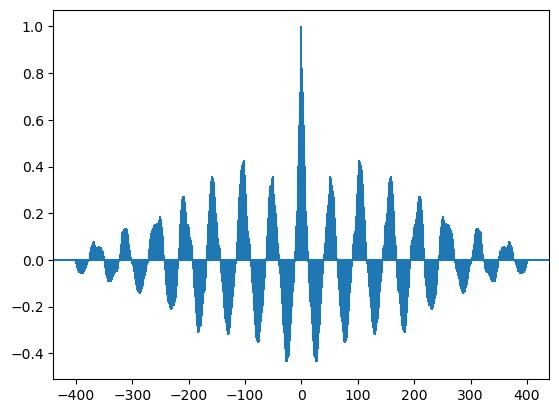

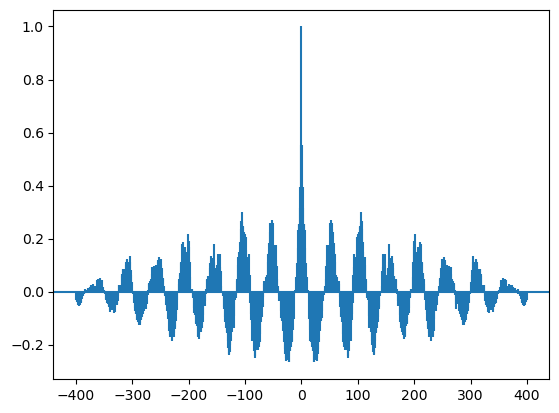

,"Atazar, El","Vado, El"
FECHA,,
2014-08-26,-3.0,-1.0
2014-09-02,-4.0,-2.0
2014-09-09,-4.0,-2.0
2014-09-16,-5.0,-3.0
2014-09-23,-3.0,-2.0


In [17]:
# Crea diff embalses para ver la delta entre semanas

diff_embalses = pd.DataFrame()
diff_embalses['Atazar, El'] = embalses_df[embalses_df['EMBALSE_NOMBRE'] == 'Atazar, El']['AGUA_ACTUAL'].diff()
diff_embalses['Vado, El'] = embalses_df[embalses_df['EMBALSE_NOMBRE'] == 'Vado, El']['AGUA_ACTUAL'].diff()

# diff_embalses['date'] = pd.to_datetime(diff_embalses.index, format='%YYYY-%MM-%dd')

diff_embalses = diff_embalses.iloc[1:]

diff_embalses.head()
diff_embalses['Vado, El'].autocorr()

plt.acorr(diff_embalses['Atazar, El'], maxlags = 400)
plt.show()

plt.acorr(diff_embalses['Vado, El'], maxlags = 400)
plt.show()

diff_embalses.head()

,Prec. Acumulado,"Atazar, El","Vado, El"
date,,,
2014-08-26,0.0,-3.0,-1.0
2014-09-02,1.0,-4.0,-2.0
2014-09-09,2.0,-4.0,-2.0
2014-09-16,0.0,-5.0,-3.0
2014-09-23,0.0,-3.0,-2.0
...,...,...,...
2023-03-07,2.0,2.0,-2.0
2023-03-14,2.0,0.0,0.0
2023-03-21,0.0,4.0,-1.0


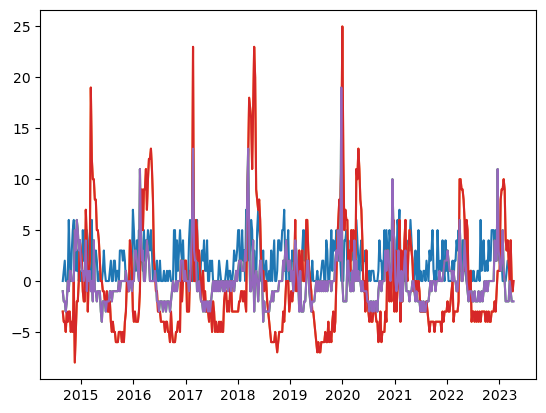

In [18]:
#calculate sum of values, grouped by week
df_out_embalses = df_out.copy()
df_out_embalses['date'] = pd.to_datetime(df_out_embalses.index, format='%YYYY-%MM-%dd')
df_out_embalses = df_out_embalses[(df_out_embalses['date'] > min(embalses_df['FECHA'])) &
                                  (df_out_embalses['date'] <= max(embalses_df['FECHA']))]

df_out_embalses['Prec. Acumulado'] = df_out_embalses['Prec. Acumulado'].astype(float) 

df_out_embalses['date'] = pd.to_datetime(df_out_embalses['date']) - pd.to_timedelta(7, unit='d')
df_out_embalses = df_out_embalses.groupby([pd.Grouper(key='date', freq='W-TUE')])['Prec. Acumulado'].sum()

df_out_embalses = df_out_embalses.to_frame()

diff_embalses.index.name = 'date'
df_out_embalses = df_out_embalses.merge(diff_embalses, on = 'date')


plt.plot(df_out_embalses)
plt.plot(diff_embalses)
plt.plot()

df_out_embalses.head()

df_out_embalses

,Prec. Acumulado,"Atazar, El","Vado, El"
date,,,
2014-08-26,0.0,0.0,0.0
2014-09-02,1.0,0.0,0.0
2014-09-09,2.0,0.0,0.0
2014-09-16,0.0,0.0,0.0
2014-09-23,0.0,0.0,0.0


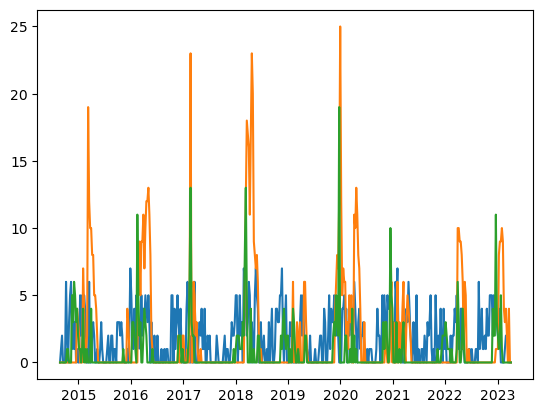

In [19]:
df_out_embalses
df_out_embalses[df_out_embalses < 0] = 0
df_out_embalses.corr()

plt.plot(df_out_embalses)

plt.plot()
df_out_embalses.head()


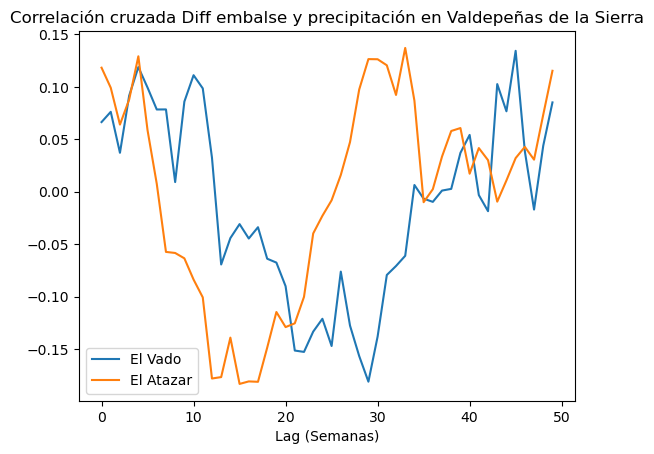

El Atazar correla al máximo con el reg de prec en el pueblo a las 1 semanas.
El Vado correla al máximo con el reg de prec en el pueblo a las 1 semanas.


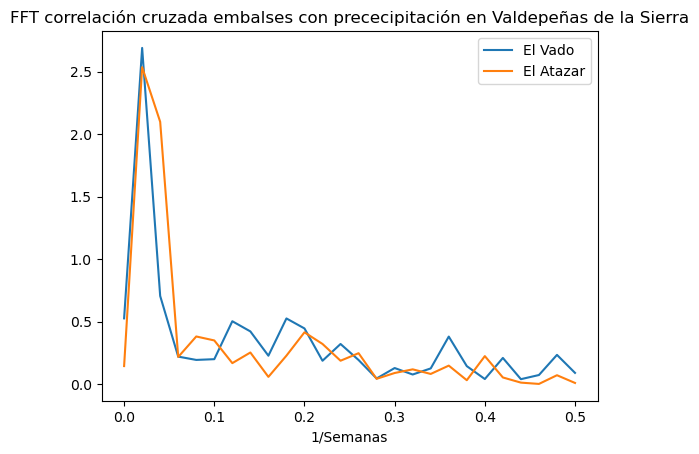

In [20]:
# Calcula la correlación cruzada para buscar cuando es máxima aplicando un lag
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

xcov_vado = [crosscorr(df_out_embalses['Prec. Acumulado'], df_out_embalses['Vado, El'], lag=i) for i in range(50)]
xcov_atazar = [crosscorr(df_out_embalses['Prec. Acumulado'], df_out_embalses['Atazar, El'], lag=i) for i in range(50)]

plt.plot(xcov_vado, label='El Vado')
plt.plot(xcov_atazar, label='El Atazar')
plt.legend()
plt.xlabel('Lag (Semanas)')
plt.title('Correlación cruzada Diff embalse y precipitación en Valdepeñas de la Sierra')
plt.show()

from scipy.fft import rfft, rfftfreq

# Number of samples in normalized_tone
SAMPLE_RATE = 1
DURATION = len(xcov_vado)

N = SAMPLE_RATE * DURATION

yf_vado = rfft(xcov_vado)
xf_vado = rfftfreq(N, 1 / SAMPLE_RATE)

yf_atazar = rfft(xcov_atazar)
xf_atazar = rfftfreq(N, 1 / SAMPLE_RATE)

max_val_atazar = np.argmax(abs(yf_atazar))
max_val_vado = np.argmax(abs(yf_vado))

print('El Atazar correla al máximo con el reg de prec en el pueblo a las {} semanas.'.format(max_val_atazar))
print('El Vado correla al máximo con el reg de prec en el pueblo a las {} semanas.'.format(max_val_vado))

# print(max_val)
# print(xf[max_val])

# plt.plot(xf, np.abs(yf))
plt.plot(xf_vado, np.abs(yf_vado), label='El Vado')
plt.plot(xf_atazar, np.abs(yf_atazar), label='El Atazar')
plt.legend()
plt.title('FFT correlación cruzada embalses con prececipitación en Valdepeñas de la Sierra')
plt.xlabel('1/Semanas')

plt.show()



In [21]:
import numpy as np
import scipy.signal

from matplotlib import pyplot as plt

L = xcov
# Remove DC component
L -= np.mean(L)
# Window signal
L *= scipy.signal.windows.hann(len(L))

fft = np.fft.rfft(L, norm="ortho")

plt.plot(L)
plt.figure()
plt.plot(abs(fft))

NameError: name 'xcov' is not defined

In [22]:
pd.set_option('display.max_rows', None)
df_out[df_out.index.month == 4]['T. Max.'].sort_values(ascending=False)

2023-04-27    29.1
2023-04-28    27.2
2018-04-25    26.9
2023-04-26    26.3
2018-04-24    26.0
2017-04-17    25.7
2017-04-18    25.3
2017-04-12    25.2
2023-04-25    25.1
2023-04-20    25.1
2017-04-13    24.9
2015-04-02    24.9
2023-04-09    24.8
2015-04-05    24.7
2017-04-16    24.6
2018-04-26    24.5
2023-04-29    24.4
2023-04-10    24.4
2023-04-08    24.3
2022-04-17    24.3
2015-04-01    24.1
2017-04-14    24.1
2017-04-23    24.1
2019-04-30    24.1
2015-04-23    24.1
2017-04-11    24.0
2017-04-10    23.9
2023-04-11    23.9
2015-04-30    23.8
2022-04-18    23.7
2015-04-11    23.7
2017-04-15    23.6
2015-04-14    23.6
2019-04-29    23.4
2023-04-30    23.4
2015-04-03    23.3
2019-04-28    23.1
2022-04-16    23.1
2023-04-17    23.1
2015-04-13    23.0
2023-04-24    23.0
2022-04-15    22.9
2015-04-04    22.9
2018-04-23    22.8
2017-04-19    22.7
2018-04-22    22.7
2018-04-27    22.6
2023-04-21    22.6
2017-04-09    22.5
2018-04-18    22.5
2023-04-16    22.4
2018-04-19    22.4
2023-04-06  

In [23]:
# # 'T. Min.'

# variable = 'T. Max.'

# y_2015 = df_out[(df_out['date'] >= 20150101) & (df_out['date'] <= 20151231)][variable]
# y_2016 = df_out[(df_out['date'] >= 20160101) & (df_out['date'] <= 20161231)][variable]
# y_2017 = df_out[(df_out['date'] >= 20170101) & (df_out['date'] <= 20171231)][variable]
# y_2018 = df_out[(df_out['date'] >= 20180101) & (df_out['date'] <= 20181231)][variable]
# y_2019 = df_out[(df_out['date'] >= 20190101) & (df_out['date'] <= 20191231)][variable]
# y_2020 = df_out[(df_out['date'] >= 20200101) & (df_out['date'] <= 20201231)][variable]
# y_2021 = df_out[(df_out['date'] >= 20210101) & (df_out['date'] <= 20211231)][variable]
# y_2022 = df_out[(df_out['date'] >= 20220101) & (df_out['date'] <= 20221231)][variable]
# y_2023 = df_out[(df_out['date'] >= 20230101) & (df_out['date'] <= 20231231)][variable]

# y_2015.index = y_2015.index.strftime('%d-%m')
# y_2016.index = y_2016.index.strftime('%d-%m')
# y_2017.index = y_2017.index.strftime('%d-%m')
# y_2018.index = y_2018.index.strftime('%d-%m')
# y_2019.index = y_2019.index.strftime('%d-%m')
# y_2020.index = y_2020.index.strftime('%d-%m')
# y_2021.index = y_2021.index.strftime('%d-%m')
# y_2022.index = y_2022.index.strftime('%d-%m')
# y_2023.index = y_2023.index.strftime('%d-%m')

# # Create a figure and axis for the plot
# fig, ax = plt.subplots()

# # Plot each DataFrame on the same axis
# # y_2015.plot(ax=ax, kind='line', label='2015', alpha=0.5)
# # y_2016.plot(ax=ax, kind='line', label='2016', alpha=0.5)
# # y_2017.plot(ax=ax, kind='line', label='2017', alpha=0.5)
# # y_2018.plot(ax=ax, kind='line', label='2018', alpha=0.5)
# # y_2019.plot(ax=ax, kind='line', label='2019', alpha=0.5)
# # y_2020.plot(ax=ax, kind='line', label='2020', alpha=0.5)
# y_2021.plot(ax=ax, kind='line', label='2021', alpha=0.5)
# y_2022.plot(ax=ax, kind='line', label='2022', alpha=0.5)
# y_2023.plot(ax=ax, kind='line', label='2023', alpha=0.5)

# # Set plot title and labels
# plt.title(variable + ' by year.')
# plt.xlabel('Date')
# plt.ylabel(variable)

# # Display a legend
# plt.legend()

# # Show the plot
# plt.grid(True)
# plt.show()

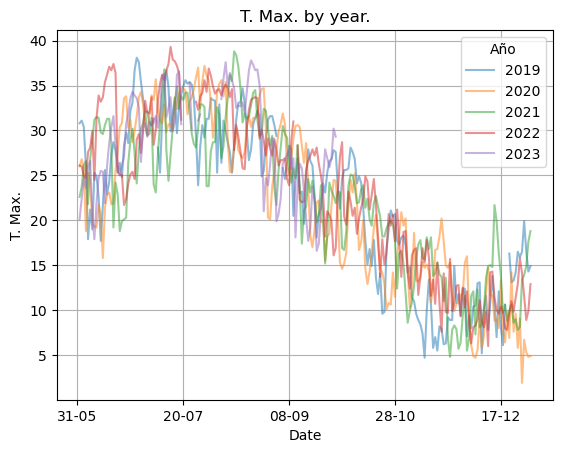

In [66]:
# DataFrame con un rango de fechas en formato dd-MM
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
date_range = date_range.strftime('%d-%m')  # Formato dd-MM
full_date_df = pd.DataFrame(index=date_range)

# # 'T. Min.'
variable = 'T. Max.'

y_2015 = df_out[(df_out['date'] >= 20150601) & (df_out['date'] <= 20151231)][variable]
y_2016 = df_out[(df_out['date'] >= 20160601) & (df_out['date'] <= 20161231)][variable]
y_2017 = df_out[(df_out['date'] >= 20170601) & (df_out['date'] <= 20171231)][variable]
y_2018 = df_out[(df_out['date'] >= 20180601) & (df_out['date'] <= 20181231)][variable]
y_2019 = df_out[(df_out['date'] >= 20190601) & (df_out['date'] <= 20191231)][variable]
y_2020 = df_out[(df_out['date'] >= 20200601) & (df_out['date'] <= 20201231)][variable]
y_2021 = df_out[(df_out['date'] >= 20210601) & (df_out['date'] <= 20211231)][variable]
y_2022 = df_out[(df_out['date'] >= 20220601) & (df_out['date'] <= 20221231)][variable]
y_2023 = df_out[(df_out['date'] >= 20230601) & (df_out['date'] <= 20231231)][variable]
# y_2023.drop_duplicates(keep='first', inplace=True)
# y_2023.fillna(y_2023.mean(), inplace=True) 
y_2023 = pd.DataFrame(y_2023)

y_2015.index = y_2015.index.strftime('%d-%m')
y_2016.index = y_2016.index.strftime('%d-%m')
y_2017.index = y_2017.index.strftime('%d-%m')
y_2018.index = y_2018.index.strftime('%d-%m')
y_2019.index = y_2019.index.strftime('%d-%m')
y_2020.index = y_2020.index.strftime('%d-%m')
y_2021.index = y_2021.index.strftime('%d-%m')
y_2022.index = y_2022.index.strftime('%d-%m')
y_2023.index = y_2023.index.strftime('%d-%m')

y_2015 = full_date_df.join(y_2015, how='left')
y_2015.columns = ['2015']
y_2016 = full_date_df.join(y_2016, how='left')
y_2016.columns = ['2016']
y_2017 = full_date_df.join(y_2017, how='left')
y_2017.columns = ['2017']
y_2018 = full_date_df.join(y_2018, how='left')
y_2018.columns = ['2018']
y_2019 = full_date_df.join(y_2019, how='left')
y_2019.columns = ['2019']
y_2020 = full_date_df.join(y_2020, how='left')
y_2020.columns = ['2020']
y_2021 = full_date_df.join(y_2021, how='left')
y_2021.columns = ['2021']
y_2022 = full_date_df.join(y_2022, how='left')
y_2022.columns = ['2022']
y_2023 = full_date_df.join(y_2023, how='left')
y_2023.columns = ['2023']

# ventana= 30
# y_2015 = y_2015.rolling(ventana).mean()
# y_2016 = y_2016.rolling(ventana).mean()
# y_2017 = y_2017.rolling(ventana).mean()
# y_2018 = y_2018.rolling(ventana).mean()
# y_2019 = y_2019.rolling(ventana).mean()
# y_2020 = y_2020.rolling(ventana).mean()
# y_2021 = y_2021.rolling(ventana).mean()
# y_2022 = y_2022.rolling(ventana).mean()
# y_2023 = y_2023.rolling(ventana).mean()

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot each DataFrame on the same axis
# line1 = y_2015.plot(ax=ax, kind='line', label='2015', alpha=0.5)
# line2 = y_2016.plot(ax=ax, kind='line', label='2016', alpha=0.5)
# line3 = y_2017.plot(ax=ax, kind='line', label='2017', alpha=0.5)
# line4 = y_2018.plot(ax=ax, kind='line', label='2018', alpha=0.5)
line5 = y_2019.plot(ax=ax, kind='line', label='2019', alpha=0.5)
line6 = y_2020.plot(ax=ax, kind='line', label='2020', alpha=0.5)
line7 = y_2021.plot(ax=ax, kind='line', label='2021', alpha=0.5)
line8 = y_2022.plot(ax=ax, kind='line', label='2022', alpha=0.5)
line9 = y_2023.plot(ax=ax, kind='line', label='2023', alpha=0.5)

# Set plot title and labels
plt.title(variable + ' by year.')
plt.xlabel('Date')
plt.ylabel(variable)

# Display a legend
# Configura la leyenda con etiquetas personalizadas
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles, labels, title="Año")
plt.legend(title="Año")

# Show the plot
plt.grid(True)
plt.show()

In [55]:
# y_2023.drop_duplicates(keep='first', inplace=True)
y_2023.tail()

2023-09-26    26.9
2023-09-27    25.9
2023-09-28    26.9
2023-09-29    30.2
2023-09-30    29.3
Name: T. Max., dtype: float64

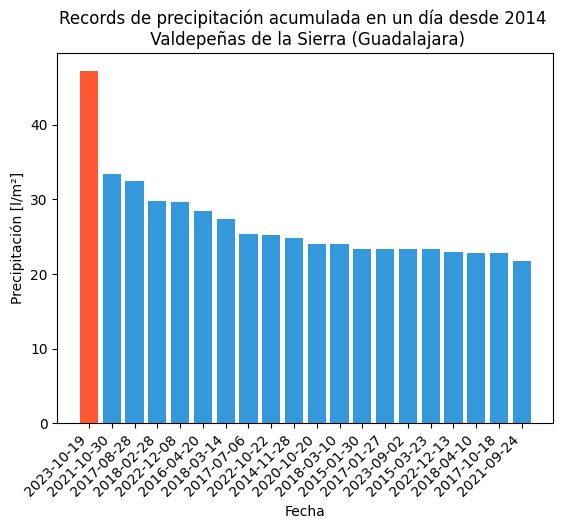

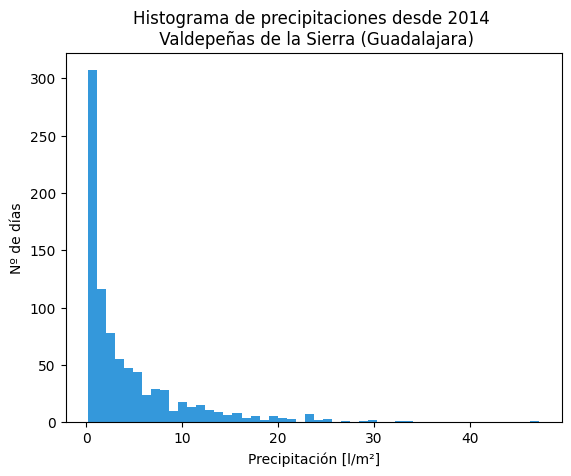

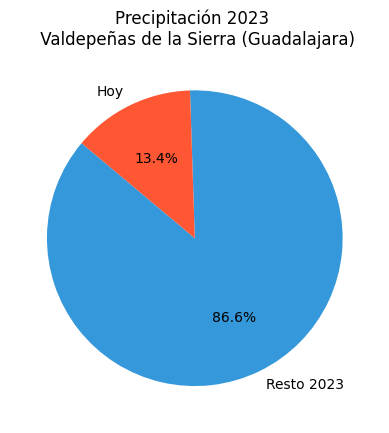

In [53]:
rain_serie = df_out['Precipitación']

today_rain = 47.2
nueva_fila = pd.Series({pd.to_datetime('2023-10-19'): today_rain})
rain_serie = pd.concat([rain_serie,nueva_fila])

rain_serie = rain_serie[rain_serie > 0]

corte = rain_serie.sort_values(ascending=False).head(20)
corte.index = corte.index.strftime('%Y-%m-%d')

colors = ['#FF5733'] + ['#3498db'] * (len(corte) - 1)

plt.bar(corte.index,corte.values, color = colors)
plt.xticks(rotation=45, ha='right')  # Rotar y alinear a la derecha para facilitar la lectura

# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Precipitación [l/m²]')
plt.title('Records de precipitación acumulada en un día desde 2014 \n Valdepeñas de la Sierra (Guadalajara)')
plt.show()


plt.hist(rain_serie, bins=50, color = '#3498db')

from fitter import Fitter, get_common_distributions, get_distributions
f = Fitter(rain_serie,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "expon"])
f.fit()

plt.xlabel('Precipitación [l/m²]')
plt.ylabel('Nº de días')
plt.title('Histograma de precipitaciones desde 2014 \n Valdepeñas de la Sierra (Guadalajara)')
plt.show()

rain_2023 = rain_serie[rain_serie.index > pd.to_datetime('2022-12-31')]
rain_2023 = rain_2023[rain_2023 > 0]
today_sector = 100 * today_rain / (rain_2023.sum() + today_rain)
previous_sector = 100 * rain_2023.sum() / (rain_2023.sum() + today_rain)
labels = ['Resto 2023','Hoy']
colors = ['#3498db','#FF5733']
plt.pie([previous_sector, today_sector], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Precipitación 2023 \n Valdepeñas de la Sierra (Guadalajara)')
plt.show()

# f.summary()

In [54]:
corte

2023-10-19    47.2
2021-10-30    33.4
2017-08-28    32.4
2018-02-28    29.8
2022-12-08    29.6
2016-04-20    28.4
2018-03-14    27.4
2017-07-06    25.4
2022-10-22    25.2
2014-11-28    24.8
2020-10-20    24.0
2018-03-10    24.0
2015-01-30    23.4
2017-01-27    23.4
2023-09-02    23.4
2015-03-23    23.4
2022-12-13    23.0
2018-04-10    22.8
2017-10-18    22.8
2021-09-24    21.8
dtype: float64